In [ ]:
%run settings.ipynb

In [ ]:
plt.style.use('ggplot')

(0.625, 8.875, 0.6672793759076479, 6.332720624092351)

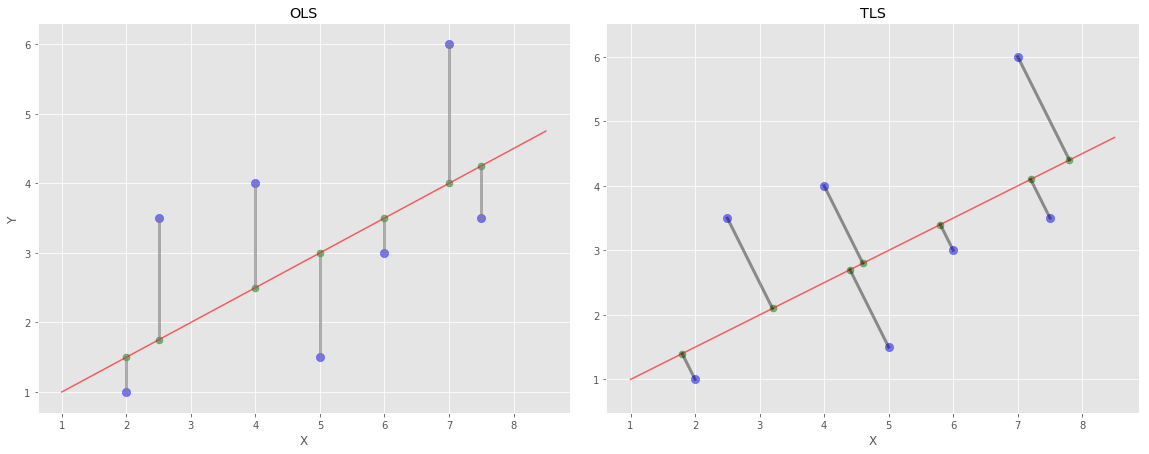

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,6))
plt.xlim((0, 10))
plt.ylim((0, 7))
plt.tight_layout(w_pad=1.5)
#red line
points = np.array([[1,1], [9,5]])
slope = (points[1,1] - points[0,1])/(points[1,0] - points[0,0])
intercept = points[0,1]-slope*points[0,0]
#data points
xy = np.array([[2,2.5,4,5,6,7,7.5],
               [1,3.5,4,1.5,3,6,3.5]]).T
#calculate projection points
y_fun = lambda x, s=slope, i=intercept: s*x +i
def y_fun_tls (x, y, slope, intercept):
    s = (-1./slope)
    i = y - s*x
    #solve linear equation: -ax+1=b
    a = np.array([[-s, 1.], [-slope, 1.]])
    b = np.array([i, intercept])
    xy = np.linalg.solve(a, b)
    return xy
#preprocess data for plot
ln = np.linspace(xy[:,0].min()-1, xy[:,0].max()+1, 10)
line = y_fun(ln)
y_ols_proj = [y_fun(x) for x in xy[:,0]]
xy_tls_proj = np.array([y_fun_tls(x,y,slope,intercept) for x,y in xy])

#plot
for ax_ in (ax1, ax2):
    ax_.plot(ln, line, c='r', alpha=.6)
    ax_.scatter(xy[:,0], xy[:,1], s=70, alpha=.5, c='b')
#projection points
proj_prop = dict(c='g', s=50, alpha=.5)
ax1.scatter(xy[:,0], y_ols_proj, **proj_prop)
ax2.scatter(xy_tls_proj[:,0], xy_tls_proj[:,1], **proj_prop)
#residual grey lines for ols and tls
for x, y_start, y_end in zip(xy[:,0], xy[:,1], y_ols_proj):
    ax1.plot(np.full(2,x), [y_start, y_end] , c='gray', alpha=.6, linewidth=3.)
for x_start, x_end, y_start, y_end in zip(xy[:,0], xy_tls_proj[:,0], xy[:,1], xy_tls_proj[:,1]):
    ax2.plot([x_start, x_end], [y_start, y_end] , c='k', alpha=.4, linewidth=3.)

for ax_, labelx, labely, title in zip([ax1, ax2], np.full(2,'X'), ['Y',''], ['OLS','TLS']):
    ax_.set_xlabel(labelx)
    ax_.set_ylabel(labely)
    ax_.set_title(title)
    
plt.axis('equal')

In [ ]:
#facecolors='none', edgecolors='b', linewidth=2.